In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import colors
from matplotlib.colors import LogNorm
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'lower'
# mpl.rcParams["image.dpi"] = 200
import os
import numpy as np
import pandas as pd

import mplhep as hep
plt.style.use(hep.style.CMS)
from plotting_utils import *
import uproot
import awkward as ak

In [2]:
input_folder = "/work/dvalsecc/Clustering/dataset/genmatching_efficiency_studies/electrons_genmatching/"
output_folder = "plots/electrons_gen_matching_v2/patElectron_mustache/"
os.makedirs(output_folder, exist_ok=True)

In [3]:
df = pd.HDFStore(f"{input_folder}/Mustache_235noise_UL18_v3.h5py", "r")["df"]
df.rename(columns={"output_object.csv":"genpart_index"}, inplace=True)
df = df.iloc[:-1]

# GenParticles

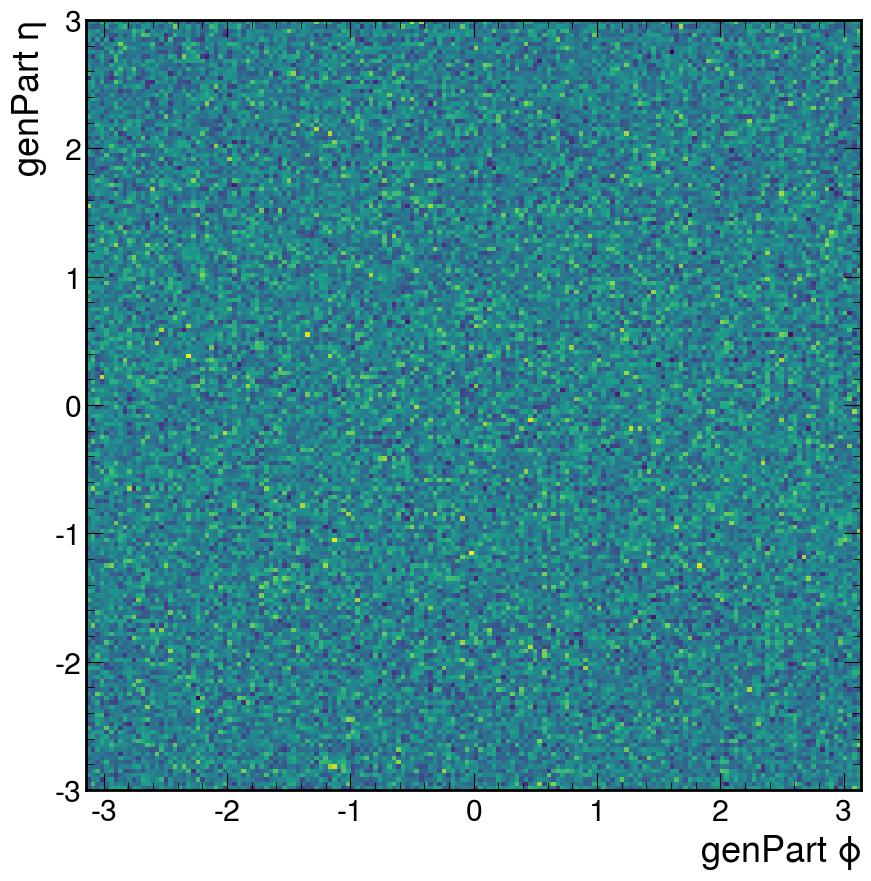

In [4]:
plt.hist2d(df.genpart_phi,df.genpart_eta,  bins=(170, 180), range=((-np.pi,np.pi),(-3,3)));
plt.xlabel("genPart $\phi$")
plt.ylabel("genPart $\eta$")
plt.savefig(f"{output_folder}/genpart_etaphi.png")

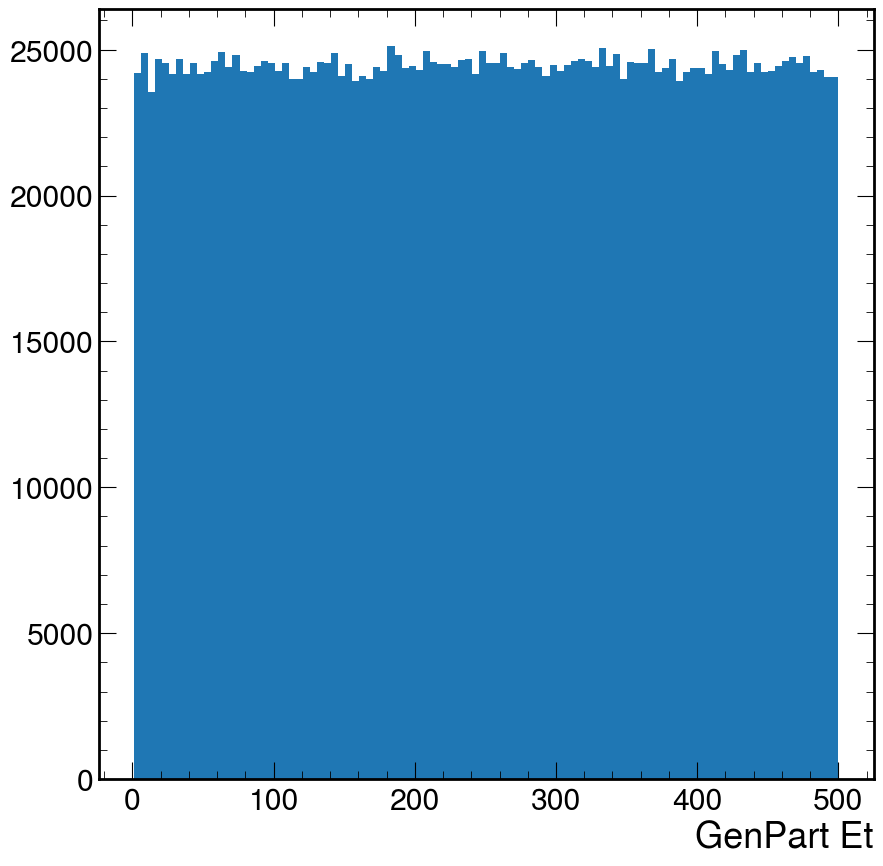

In [5]:
plt.hist(df.genpart_et, bins=100);
plt.xlabel("GenPart Et")
plt.savefig(f"{output_folder}/genpart_et.png")

# SuperClusters

Taking the SC closest to the genparticle (dR < 0.2)

In [6]:
dfsc = df[df.sc_matched==1]

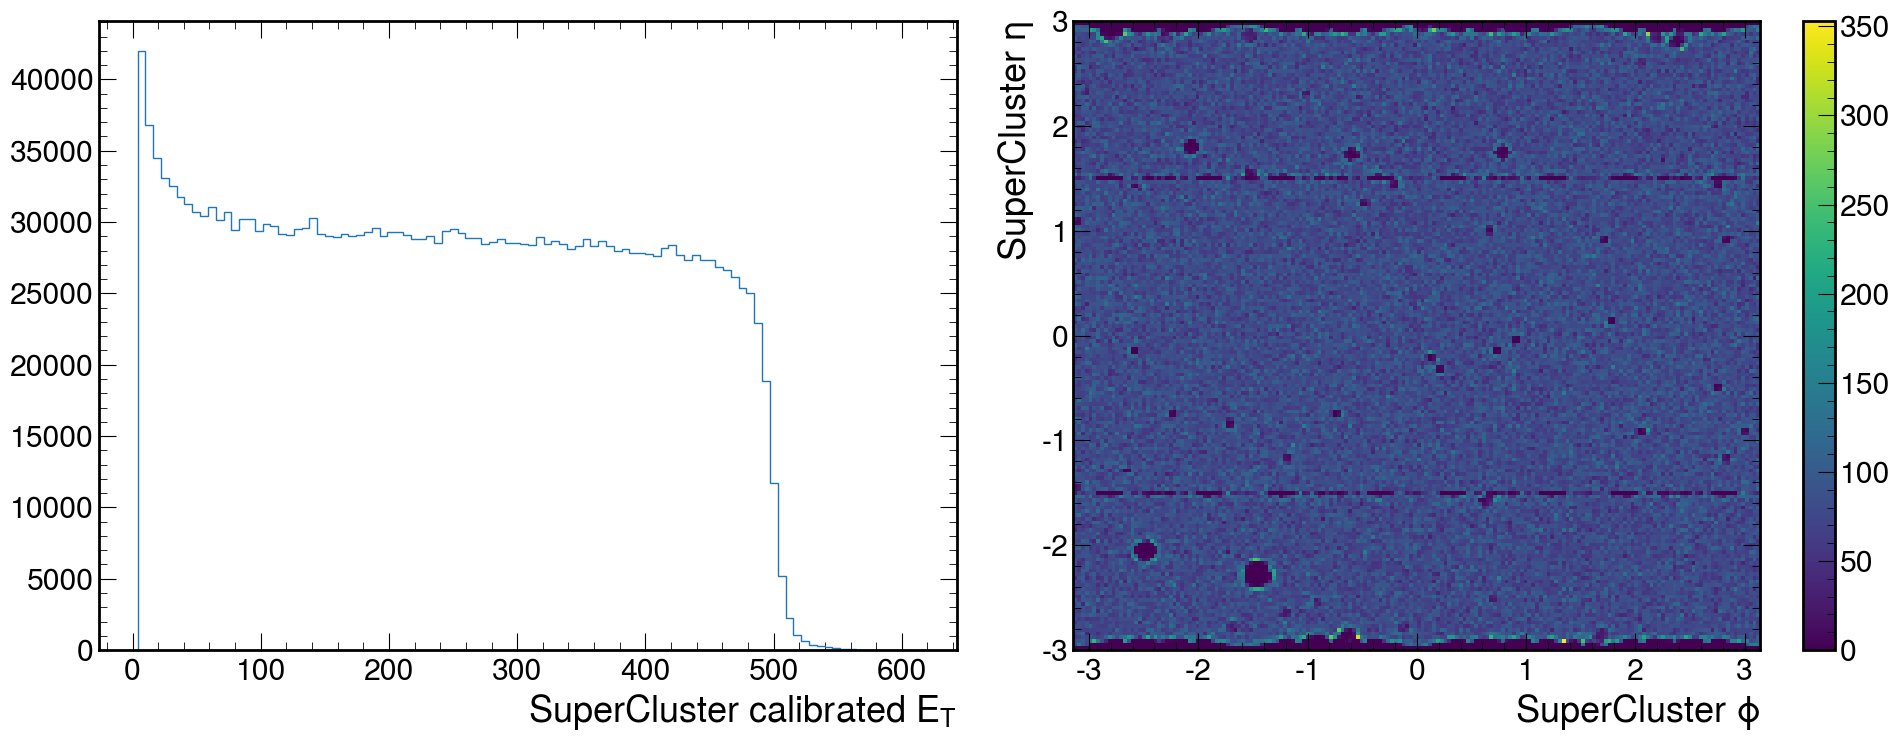

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.hist(dfsc.et_sc_calib, bins=100, histtype="step")
ax1.set_xlabel("SuperCluster calibrated $E_T$")
*b, C = ax2.hist2d(dfsc.sc_phi, dfsc.sc_eta, bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax2.set_xlabel("SuperCluster $\phi$")
ax2.set_ylabel("SuperCluster $\eta$")
plt.colorbar(C, ax=ax2)
plt.tight_layout()
plt.savefig(f"{output_folder}/superclusters.png")

# PatElectrons

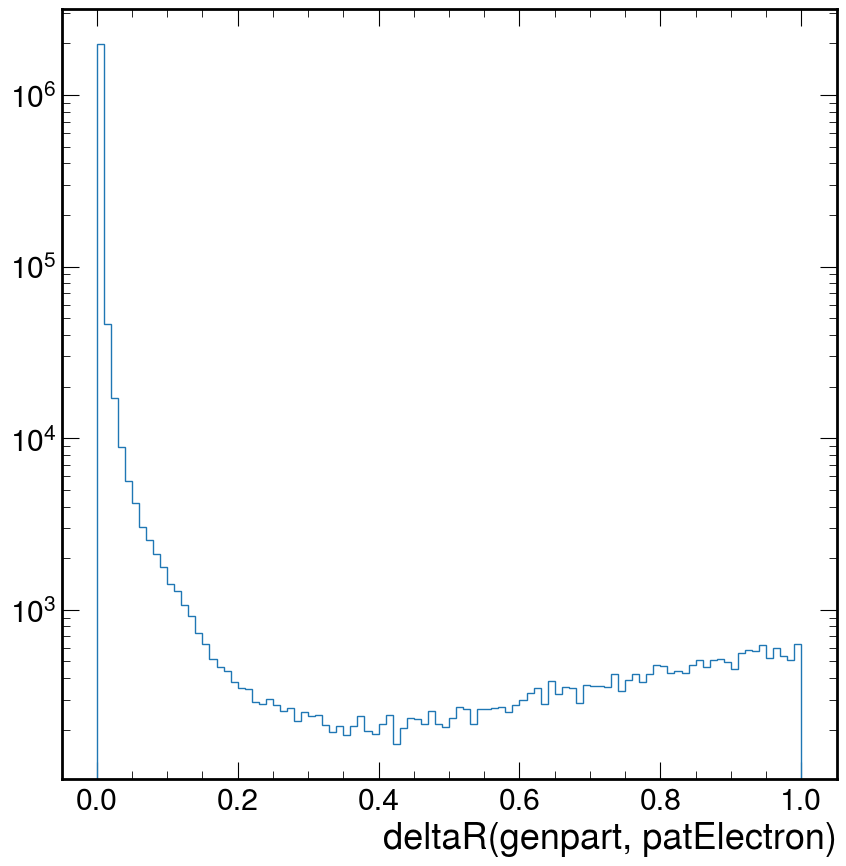

In [10]:
plt.hist(df.deltaR_genPart_ele, bins=100, range=(0,1), label="Mustache", histtype="step")
plt.xlabel("deltaR(genpart, patElectron)");
plt.yscale("log")

Applying 0.2 deltaR cut between genParticle and ele

In [11]:
dfele = df[df.deltaR_genPart_ele<0.2]

Text(1, 0, 'patEle $E_T$ / genParticle $E_T$')

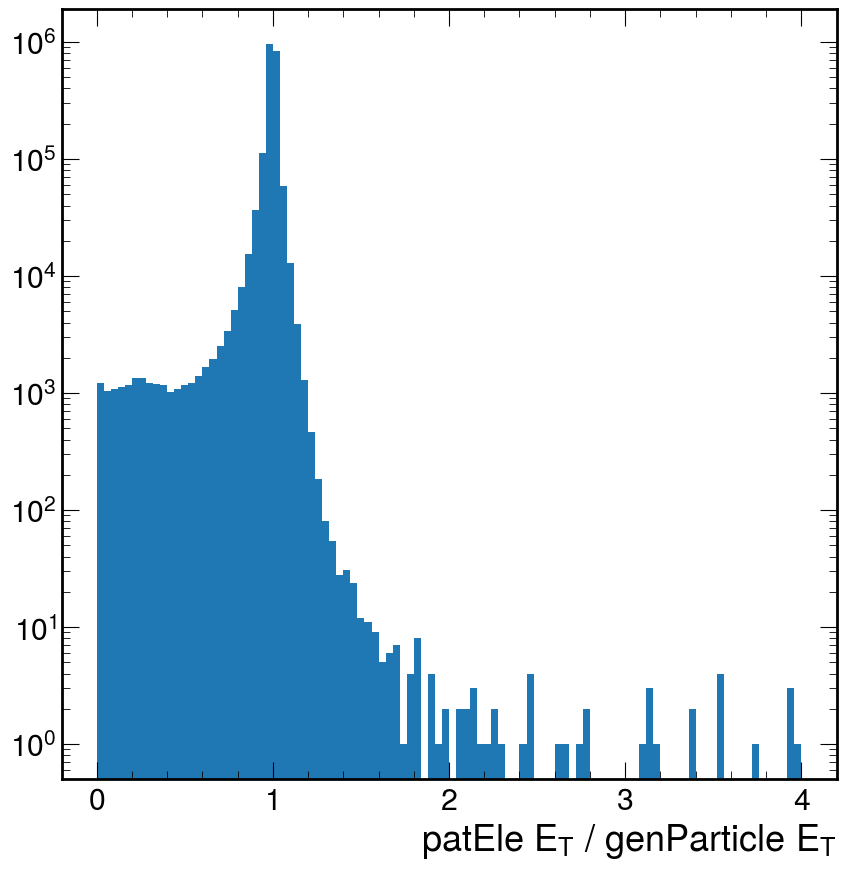

In [12]:
plt.hist(dfele.ele_et/ dfele.genpart_et, bins=100, range=(0, 4))
plt.yscale("log")
plt.xlabel("patEle $E_T$ / genParticle $E_T$")

## Eta-phi distribution

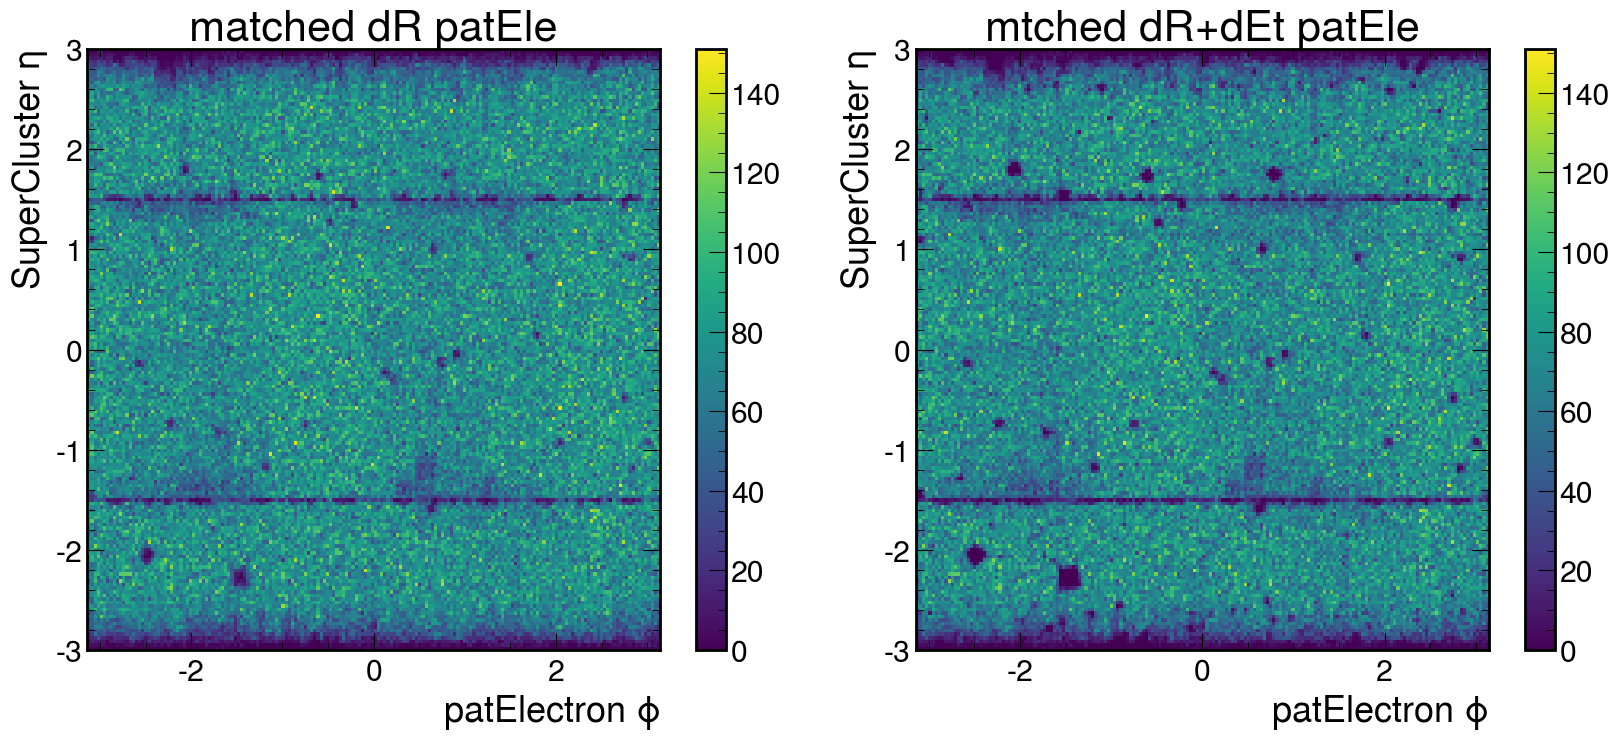

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,8))

*b, C = ax1.hist2d(dfele.ele_phi, dfele.ele_eta, bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax1.set_xlabel("patElectron $\phi$")
ax1.set_ylabel("SuperCluster $\eta$")
plt.colorbar(C, ax=ax1)
ax1.set_title("matched dR patEle")

etmask = ((dfele.ele_et/ dfele.genpart_et)> 0.9)&((dfele.ele_et/ dfele.genpart_et)< 1.1)

*b, C = ax2.hist2d(dfele[etmask].ele_phi, dfele[etmask].ele_eta, bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax2.set_xlabel("patElectron $\phi$")
ax2.set_ylabel("SuperCluster $\eta$")
ax2.set_title("mtched dR+dEt patEle")

plt.colorbar(C, ax=ax2)
plt.tight_layout()
fig.savefig(f"{output_folder}/patEle_inclusive.png")

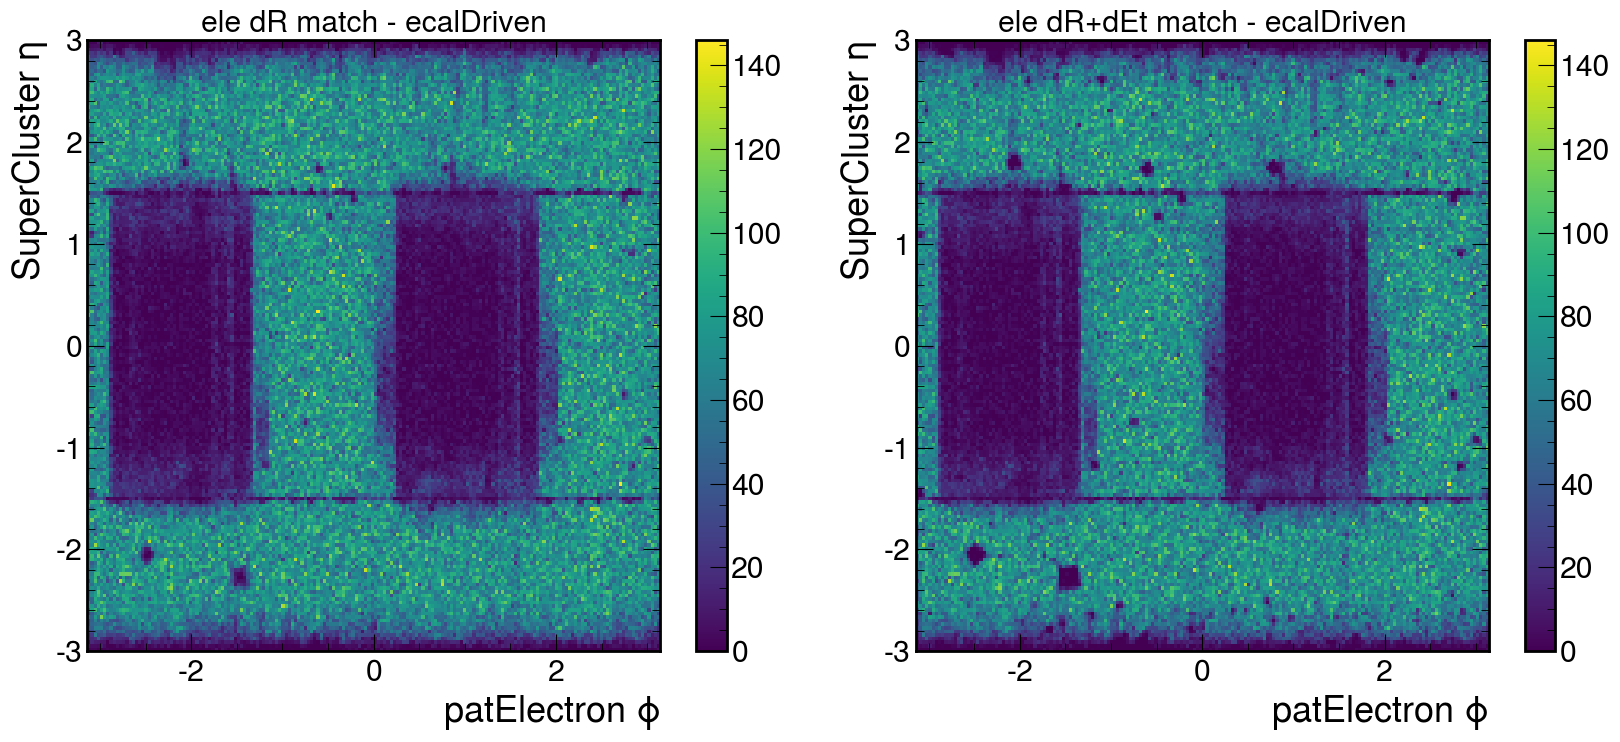

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,8))

ecalDriven = dfele.ele_isEcalDriven==1

*b, C = ax1.hist2d(dfele[ecalDriven].ele_phi, dfele[ecalDriven].ele_eta, bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax1.set_xlabel("patElectron $\phi$")
ax1.set_ylabel("SuperCluster $\eta$")
plt.colorbar(C, ax=ax1)
ax1.set_title("ele dR match - ecalDriven", fontsize="small")

etmask = ((dfele.ele_et/ dfele.genpart_et)> 0.9)&((dfele.ele_et/ dfele.genpart_et)< 1.1)

*b, C = ax2.hist2d(dfele[etmask&ecalDriven].ele_phi, dfele[etmask&ecalDriven].ele_eta, bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax2.set_xlabel("patElectron $\phi$")
ax2.set_ylabel("SuperCluster $\eta$")
ax2.set_title("ele dR+dEt match - ecalDriven", fontsize="small")

plt.colorbar(C, ax=ax2)
plt.tight_layout()
fig.savefig(f"{output_folder}/patEle_ecalDriven.png")

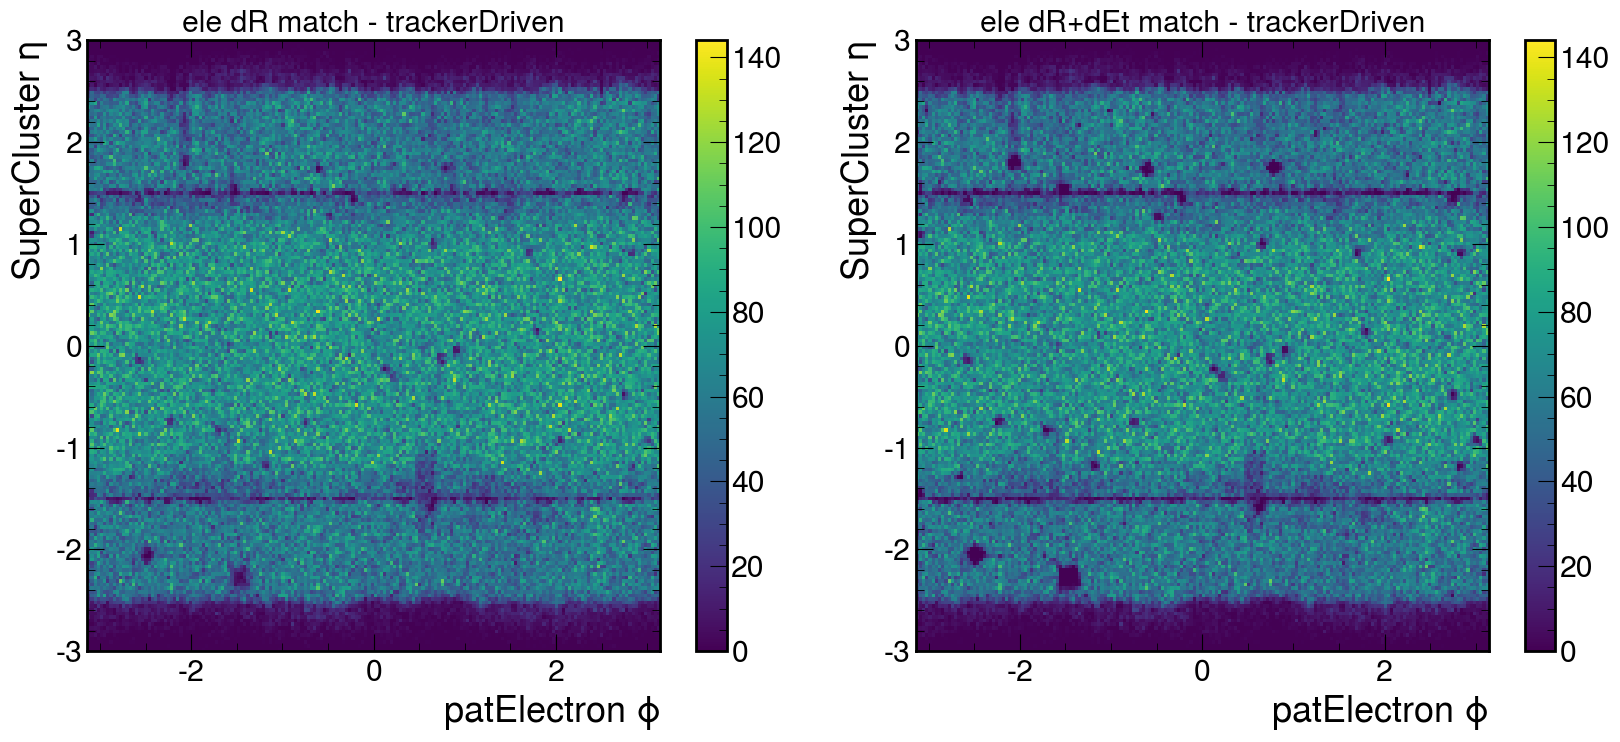

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,8))

trackerDriven = dfele.ele_isTrackerDriven==1

*b, C = ax1.hist2d(dfele[trackerDriven].ele_phi, dfele[trackerDriven].ele_eta, bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax1.set_xlabel("patElectron $\phi$")
ax1.set_ylabel("SuperCluster $\eta$")
plt.colorbar(C, ax=ax1)
ax1.set_title("ele dR match - trackerDriven", fontsize="small")

etmask = ((dfele.ele_et/ dfele.genpart_et)> 0.9)&((dfele.ele_et/ dfele.genpart_et)< 1.1)

*b, C = ax2.hist2d(dfele[etmask&trackerDriven].ele_phi, dfele[etmask&trackerDriven].ele_eta, bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax2.set_xlabel("patElectron $\phi$")
ax2.set_ylabel("SuperCluster $\eta$")
ax2.set_title("ele dR+dEt match - trackerDriven", fontsize="small")

plt.colorbar(C, ax=ax2)
plt.tight_layout()
fig.savefig(f"{output_folder}/patEle_trackerDriven.png")

# Electron seeding type

Applying dR and 10% deltaEt matching

In [8]:
etmask = ((df.ele_et/ df.genpart_et)> 0.9)&((df.ele_et/ df.genpart_et)< 1.1)
dRmask = df.deltaR_genPart_ele<0.2
dfm = df[etmask&dRmask]

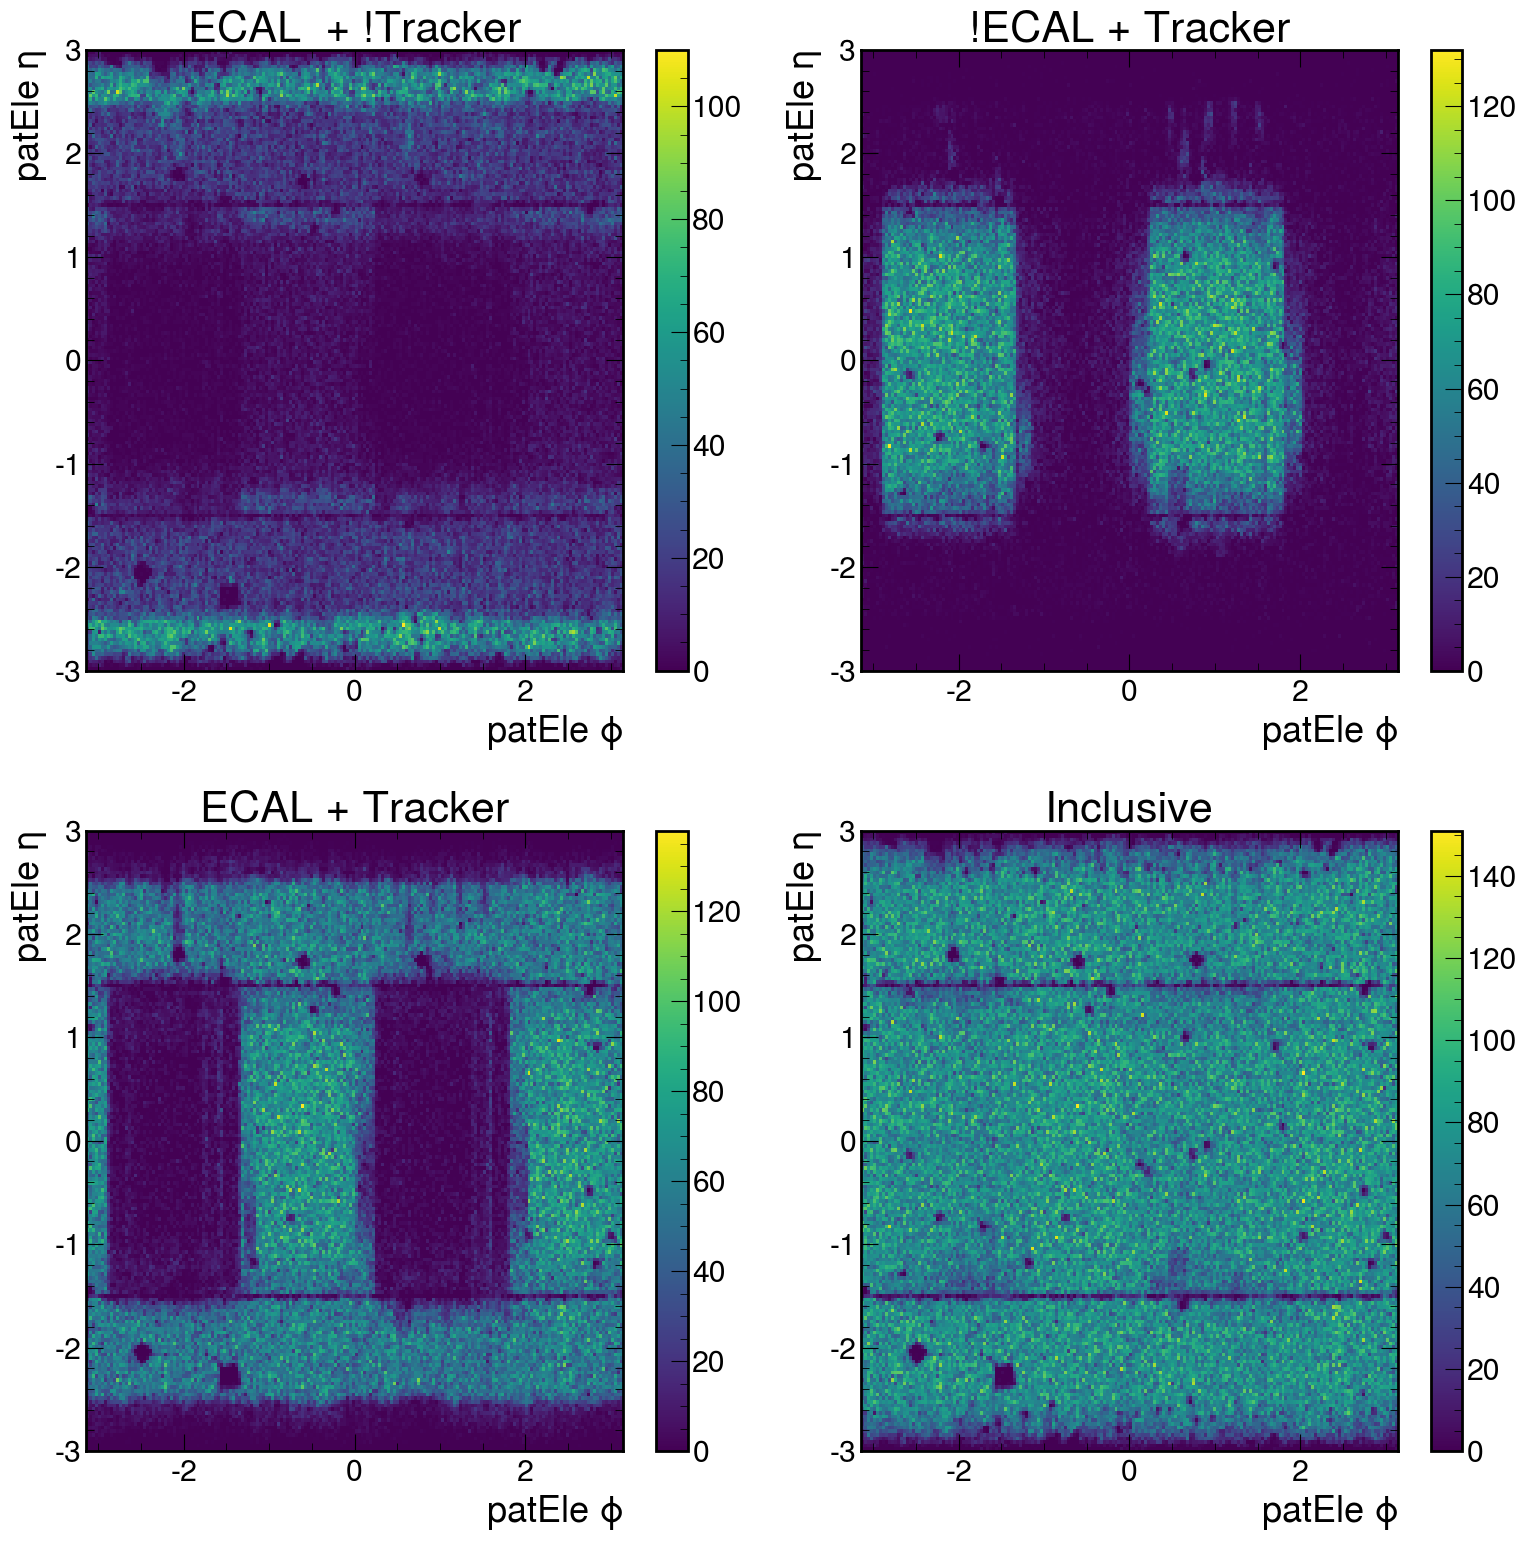

In [9]:
bins = (180, 170)
rrange = ((-np.pi, np.pi),(-3,3))

ecal_notracker, _, _ = np.histogram2d(dfm["ele_phi"][(dfm.ele_isEcalDriven==1)&(dfm.ele_isTrackerDriven==0)],
                                      dfm["ele_eta"][(dfm.ele_isEcalDriven==1)&(dfm.ele_isTrackerDriven==0)],
               bins=bins, range=rrange )

noecal_tracker, _, _ = np.histogram2d(dfm["ele_phi"][(dfm.ele_isEcalDriven==0)&(dfm.ele_isTrackerDriven==1)],
                                      dfm["ele_eta"][(dfm.ele_isEcalDriven==0)&(dfm.ele_isTrackerDriven==1)],
               bins=bins, range=rrange )

ecal_tracker, _, _ = np.histogram2d(dfm["ele_phi"][(dfm.ele_isEcalDriven==1)&(dfm.ele_isTrackerDriven==1)],
                                    dfm["ele_eta"][(dfm.ele_isEcalDriven==1)&(dfm.ele_isTrackerDriven==1)],
               bins=bins, range=rrange )

noecal_notracker, _, _ = np.histogram2d(dfm["ele_phi"][(dfm.ele_isEcalDriven==0)&(dfm.ele_isTrackerDriven==0)],
                                    dfm["ele_eta"][(dfm.ele_isEcalDriven==0)&(dfm.ele_isTrackerDriven==0)],
               bins=bins, range=rrange )

N_tot, xbins, ybins = np.histogram2d(dfm["ele_phi"],
                                    dfm["ele_eta"],
               bins=bins, range=rrange )


X, Y = np.meshgrid(xbins, ybins)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(16,16))
plt.tight_layout()


c1 = ax1.pcolormesh(X,Y, (ecal_notracker).T)
c2 = ax2.pcolormesh(X,Y, (noecal_tracker).T)
c3 = ax3.pcolormesh(X,Y, (ecal_tracker).T)
c4 = ax4.pcolormesh(X,Y, (N_tot).T)

ax1.set_ylabel("patEle $\eta$")
ax2.set_ylabel("patEle $\eta$")
ax3.set_ylabel("patEle $\eta$")
ax4.set_ylabel("patEle $\eta$")

ax1.set_xlabel("patEle $\phi$")
ax2.set_xlabel("patEle $\phi$")
ax3.set_xlabel("patEle $\phi$")
ax4.set_xlabel("patEle $\phi$")

ax1.set_title("ECAL  + !Tracker")
ax2.set_title("!ECAL + Tracker")
ax3.set_title("ECAL + Tracker")
ax4.set_title("Inclusive")


plt.colorbar(c1, ax=ax1)
plt.colorbar(c2, ax=ax2)
plt.colorbar(c3, ax=ax3)
plt.colorbar(c4, ax=ax4)
plt.tight_layout()
fig.savefig(f"{output_folder}/patElectron_efficiency_absolute.png")

### Normalized to 1

/tmp/ipykernel_70178/1260789122.py:31: RuntimeWarning: invalid value encountered in divide
  c1 = ax1.pcolormesh(X,Y, (ecal_notracker/N_tot).T, vmax=1, vmin=0)
/tmp/ipykernel_70178/1260789122.py:32: RuntimeWarning: invalid value encountered in divide
  c2 = ax2.pcolormesh(X,Y, (noecal_tracker/N_tot).T,vmax=1, vmin=0)
/tmp/ipykernel_70178/1260789122.py:33: RuntimeWarning: invalid value encountered in divide
  c3 = ax3.pcolormesh(X,Y, (ecal_tracker/N_tot).T,vmax=1, vmin=0)


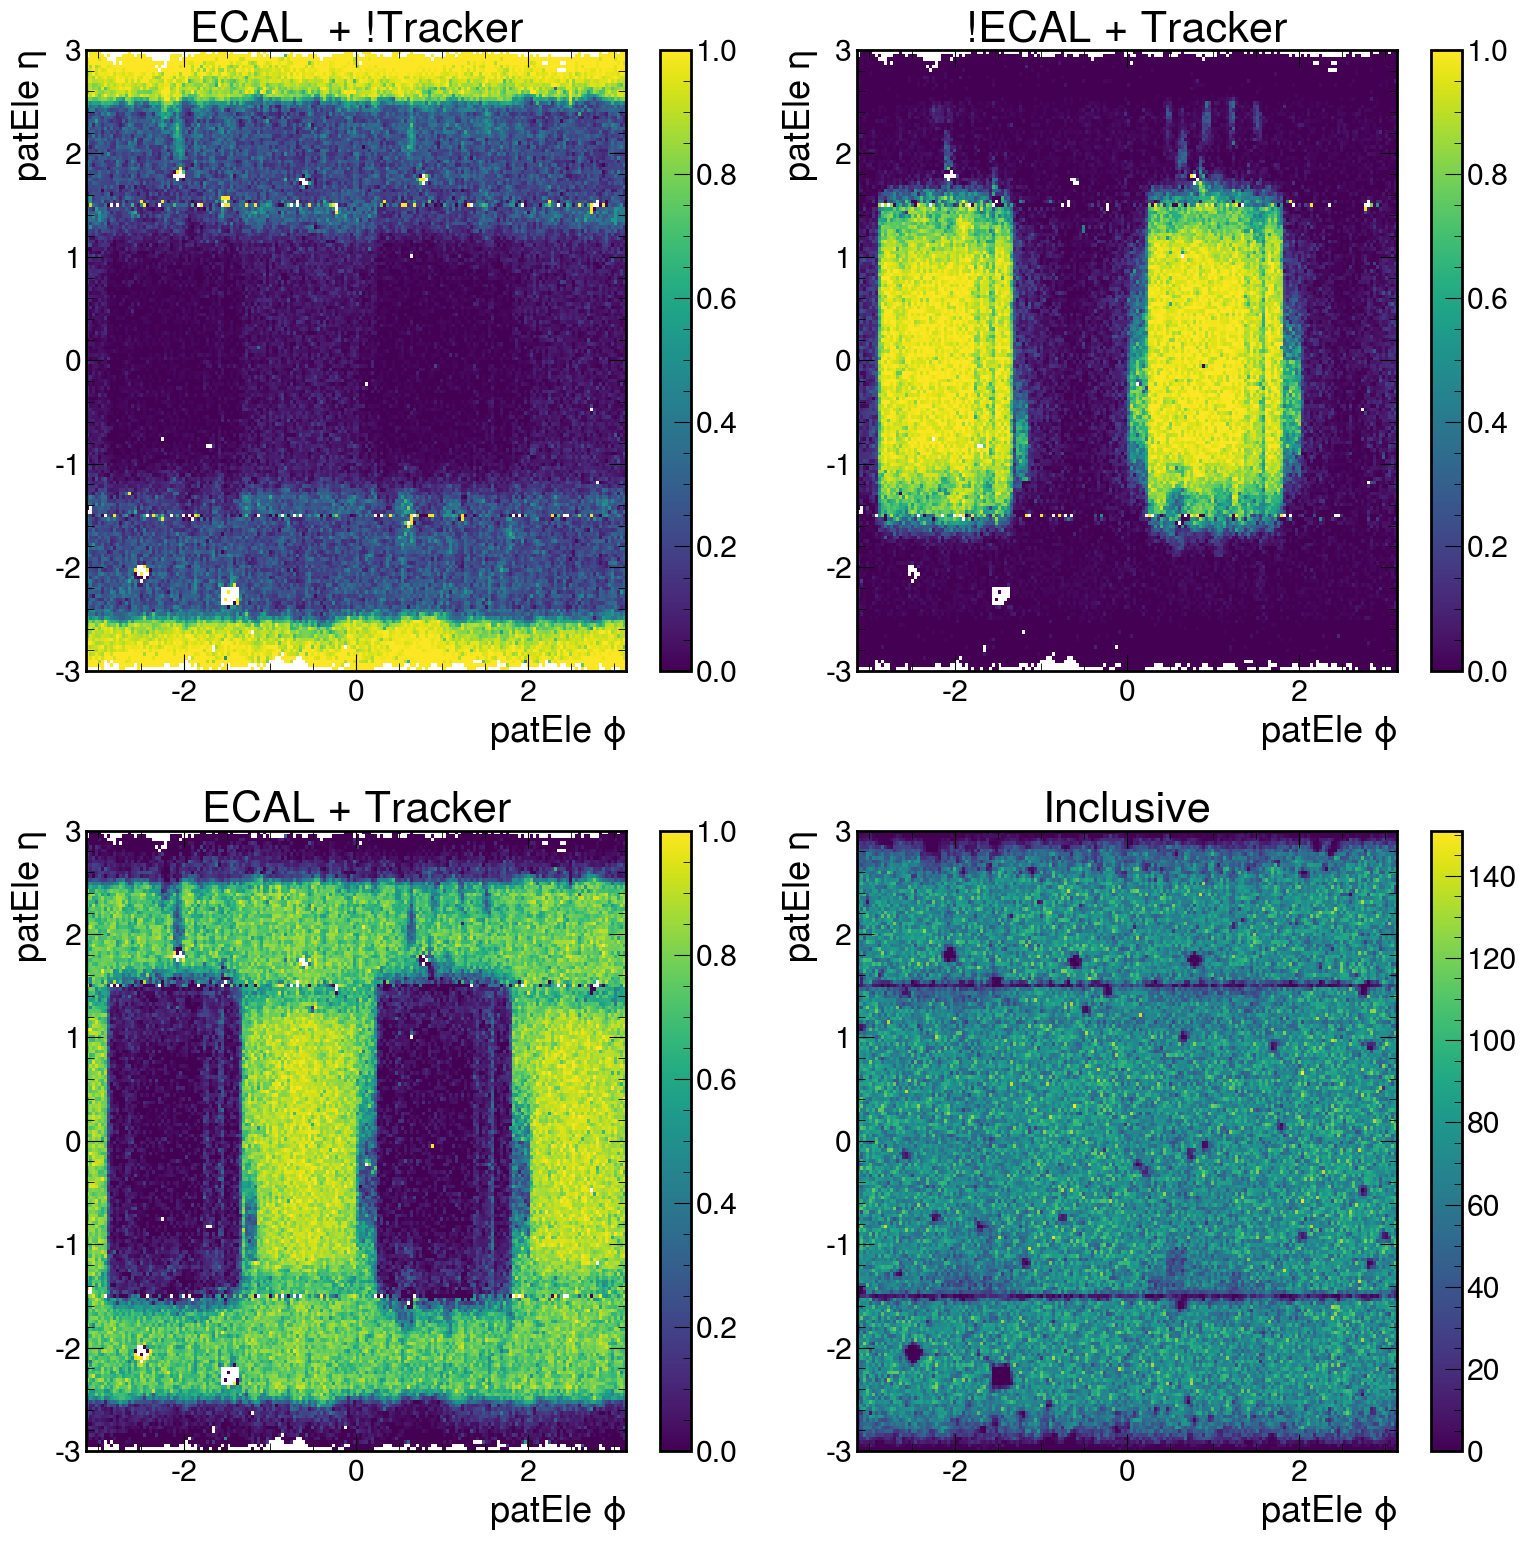

In [19]:
bins = (180, 170)
rrange = ((-np.pi, np.pi),(-3,3))

ecal_notracker, _, _ = np.histogram2d(dfm["ele_phi"][(dfm.ele_isEcalDriven==1)&(dfm.ele_isTrackerDriven==0)],
                                      dfm["ele_eta"][(dfm.ele_isEcalDriven==1)&(dfm.ele_isTrackerDriven==0)],
               bins=bins, range=rrange )

noecal_tracker, _, _ = np.histogram2d(dfm["ele_phi"][(dfm.ele_isEcalDriven==0)&(dfm.ele_isTrackerDriven==1)],
                                      dfm["ele_eta"][(dfm.ele_isEcalDriven==0)&(dfm.ele_isTrackerDriven==1)],
               bins=bins, range=rrange )

ecal_tracker, _, _ = np.histogram2d(dfm["ele_phi"][(dfm.ele_isEcalDriven==1)&(dfm.ele_isTrackerDriven==1)],
                                    dfm["ele_eta"][(dfm.ele_isEcalDriven==1)&(dfm.ele_isTrackerDriven==1)],
               bins=bins, range=rrange )

noecal_notracker, _, _ = np.histogram2d(dfm["ele_phi"][(dfm.ele_isEcalDriven==0)&(dfm.ele_isTrackerDriven==0)],
                                    dfm["ele_eta"][(dfm.ele_isEcalDriven==0)&(dfm.ele_isTrackerDriven==0)],
               bins=bins, range=rrange )

N_tot, xbins, ybins = np.histogram2d(dfm["ele_phi"],
                                    dfm["ele_eta"],
               bins=bins, range=rrange )


X, Y = np.meshgrid(xbins, ybins)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(16,16))
plt.tight_layout()


c1 = ax1.pcolormesh(X,Y, (ecal_notracker/N_tot).T, vmax=1, vmin=0)
c2 = ax2.pcolormesh(X,Y, (noecal_tracker/N_tot).T,vmax=1, vmin=0)
c3 = ax3.pcolormesh(X,Y, (ecal_tracker/N_tot).T,vmax=1, vmin=0)
c4 = ax4.pcolormesh(X,Y, (N_tot).T)

ax1.set_ylabel("patEle $\eta$")
ax2.set_ylabel("patEle $\eta$")
ax3.set_ylabel("patEle $\eta$")
ax4.set_ylabel("patEle $\eta$")

ax1.set_xlabel("patEle $\phi$")
ax2.set_xlabel("patEle $\phi$")
ax3.set_xlabel("patEle $\phi$")
ax4.set_xlabel("patEle $\phi$")

ax1.set_title("ECAL  + !Tracker")
ax2.set_title("!ECAL + Tracker")
ax3.set_title("ECAL + Tracker")
ax4.set_title("Inclusive")


plt.colorbar(c1, ax=ax1)
plt.colorbar(c2, ax=ax2)
plt.colorbar(c3, ax=ax3)
plt.colorbar(c4, ax=ax4)
plt.tight_layout()
fig.savefig(f"{output_folder}/patElectron_efficiency_fractions.png")

# Analyze difference between those two regions

In [61]:
dfhole = dfm[(dfm.ele_isEcalDriven == 0)&(dfm.ele_phi>0.5)&(dfm.ele_phi<1.5)&(dfm.ele_eta.abs()<1.5)]
dfgood = dfm[(dfm.ele_isEcalDriven == 1)&(dfm.ele_phi<0)&(dfm.ele_phi>-1)&(dfm.ele_eta.abs()<1.5)]
dfgood_ee = dfm[(dfm.ele_isEcalDriven == 1)&(dfm.ele_eta.abs()>=1.5)]

B: 50.0
A. 50.0


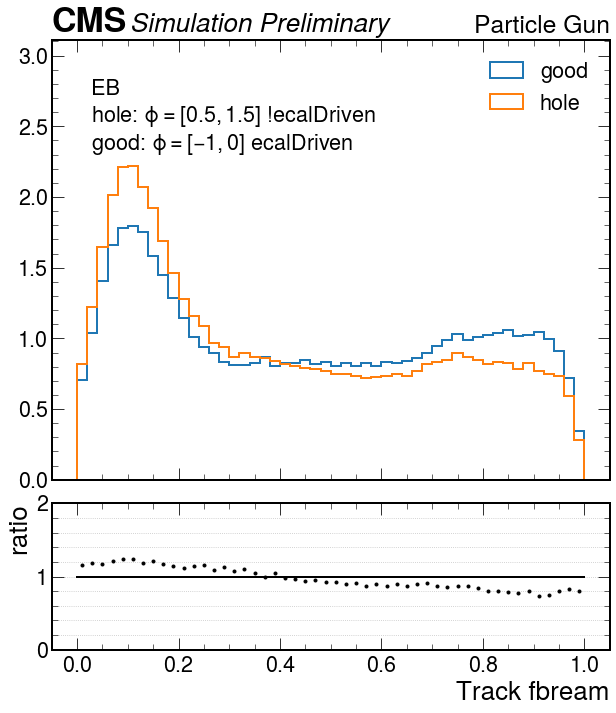

In [18]:
plot_comparison(
    dfgood.ele_tracfbrem,
    dfhole.ele_tracfbrem,
                var=f"track_fbrem", label="Track fbream",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=50, xrange=(0,1), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 0.1
A. 0.09999999999999999


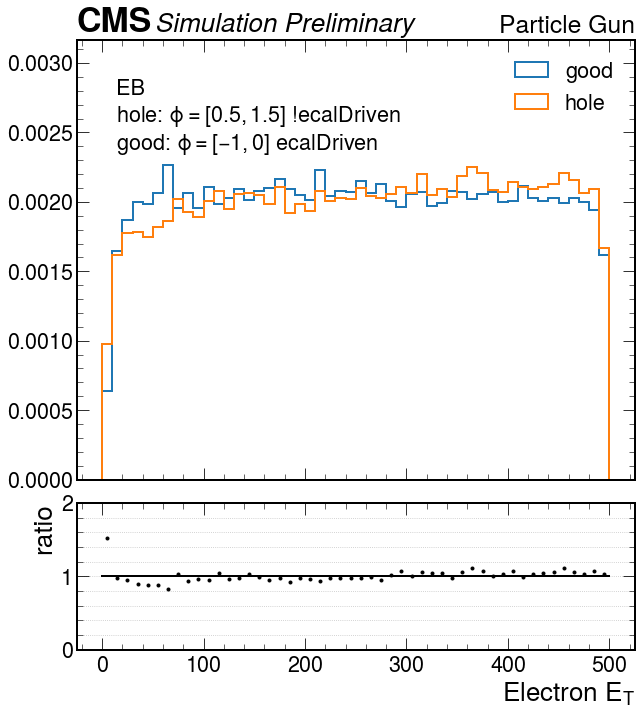

In [21]:
plot_comparison(dfgood.ele_et,
                dfhole.ele_et,
                var=f"good_vs_bad_electronEt", label="Electron $E_T$",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=50, xrange=(0,500), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 0.08333333333333331
A. 0.08333333333333334


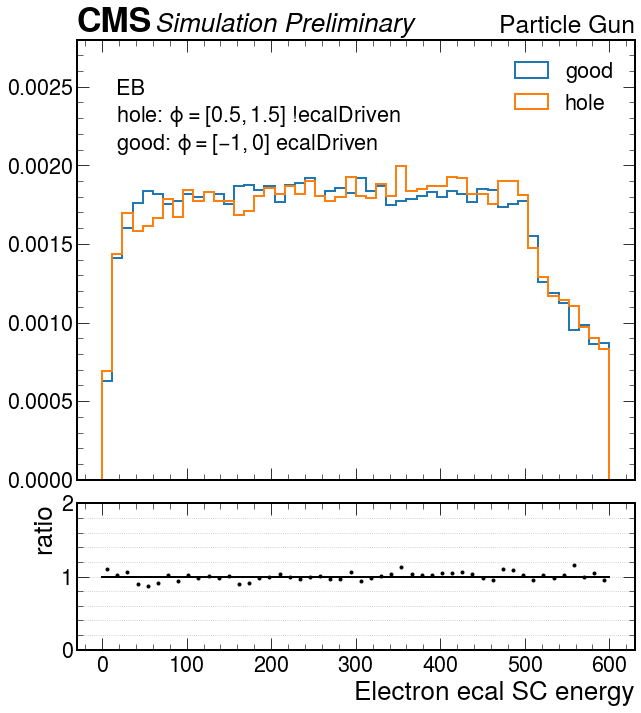

In [22]:
plot_comparison(
                dfgood.ele_ecalSCEnergy,dfhole.ele_ecalSCEnergy,
                var=f"good_vs_bad_ecalSC", label="Electron ecal SC energy",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=50, xrange=(0,600), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 1.0
A. 1.0


/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:100: RuntimeWarning: invalid value encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/work/dvalsecc/Clustering/DeepSuperCluster/Evaluation/GraphSC/reco_comparison/notebooks/GenMatchingAnalysis/plotting_utils.py:103: RuntimeWarning: invalid value encountered in divide
  A/B,


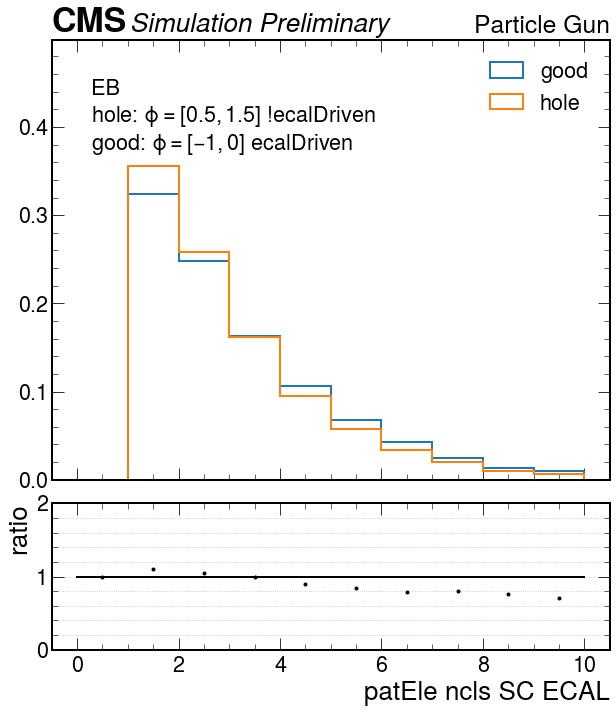

In [23]:
plot_comparison(dfgood.ele_nclsEcalSC,
                dfhole.ele_nclsEcalSC,
                var=f"good_vs_bad_nclsSCEcal", label="patEle ncls SC ECAL",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=10, xrange=(0,10), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 2999.9999999999995
A. 3000.0000000000005


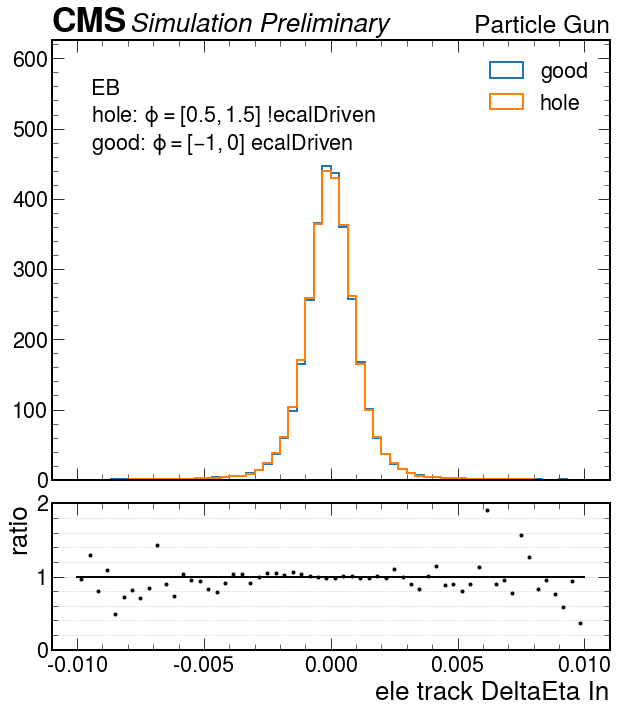

In [33]:
plot_comparison(dfgood.ele_trackDeltaEtaIn,
                dfhole.ele_trackDeltaEtaIn,
                var=f"ele_trackDeltaEtaIN", label="ele track DeltaEta In",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=60, xrange=(-0.01,0.01), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 999.9999999999994
A. 999.9999999999995


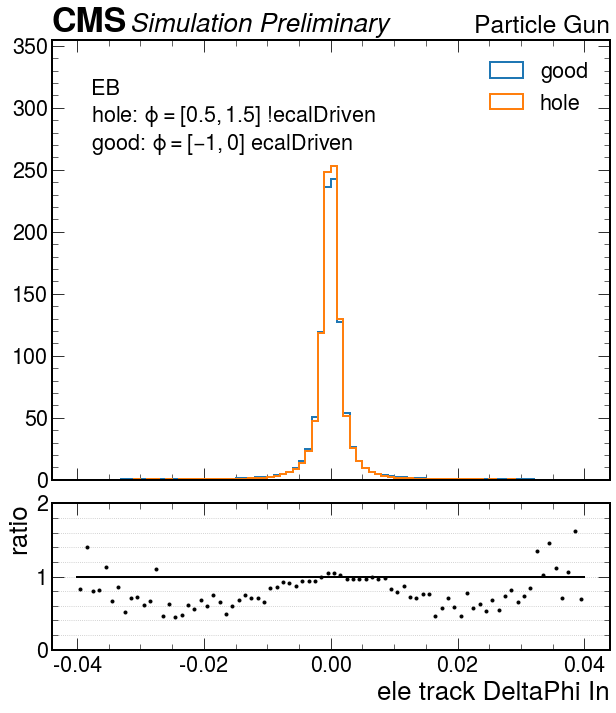

In [41]:
plot_comparison(dfgood.ele_trackDeltaPhiIn,
                dfhole.ele_trackDeltaPhiIn,
                var=f"ele_trackDeltaPhiIN", label="ele track DeltaPhi In",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=80, xrange=(-0.04,0.04), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 2999.9999999999995
A. 2999.9999999999995


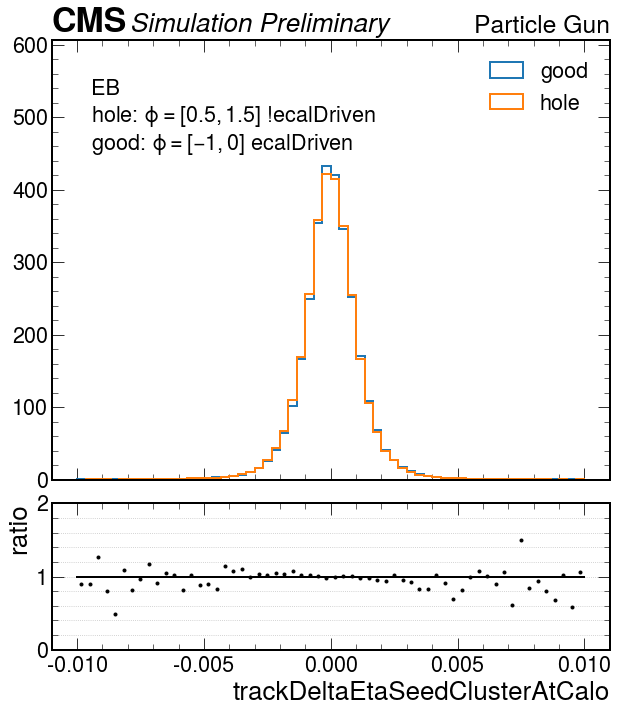

In [34]:
plot_comparison(dfgood.ele_trackDeltaEtaSeedClusterAtCalo,
                dfhole.ele_trackDeltaEtaSeedClusterAtCalo,
                var=f"ele_trackDeltaEtaSeedClusterAtCalo", label="trackDeltaEtaSeedClusterAtCalo",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=60, xrange=(-0.01,0.01), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 2999.9999999999995
A. 2999.9999999999995


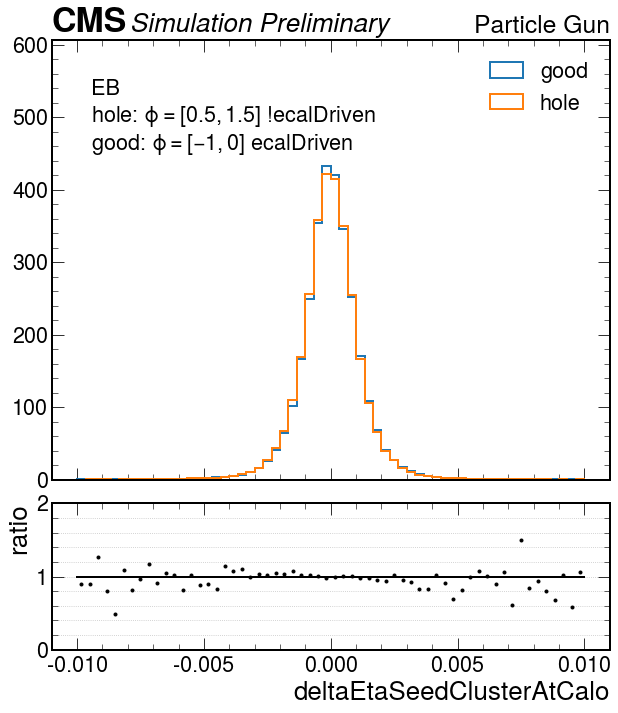

In [35]:
plot_comparison(dfgood.ele_deltaEtaSeedClusterAtCalo,
                dfhole.ele_deltaEtaSeedClusterAtCalo,
                var=f"deltaEtaSeedClusterAtCalo", label="deltaEtaSeedClusterAtCalo",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=60, xrange=(-0.01,0.01), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 2999.9999999999995
A. 2999.9999999999995


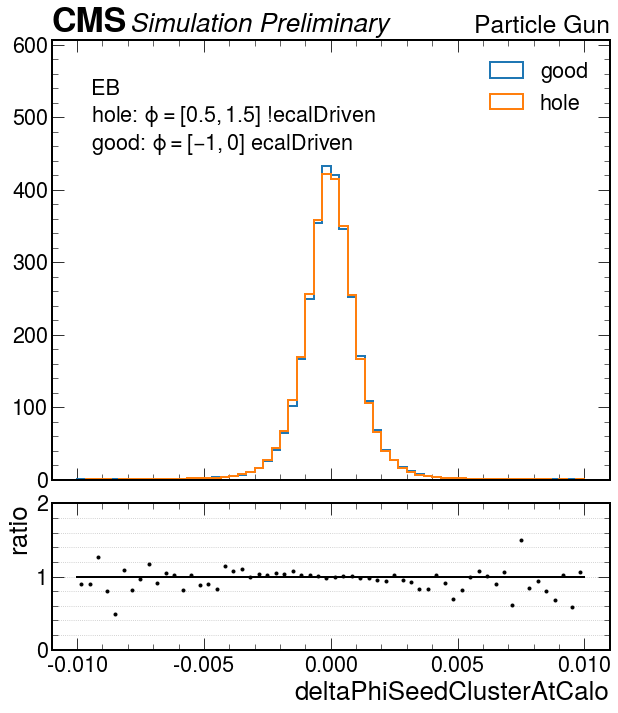

In [36]:
plot_comparison(dfgood.ele_deltaPhiSeedClusterAtCalo,
                dfhole.ele_deltaPhiSeedClusterAtCalo,
                var=f"deltaPhiSeedClusterAtCalo", label="deltaPhiSeedClusterAtCalo",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=60, xrange=(-0.01,0.01), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 4000.0000000000005
A. 4000.0


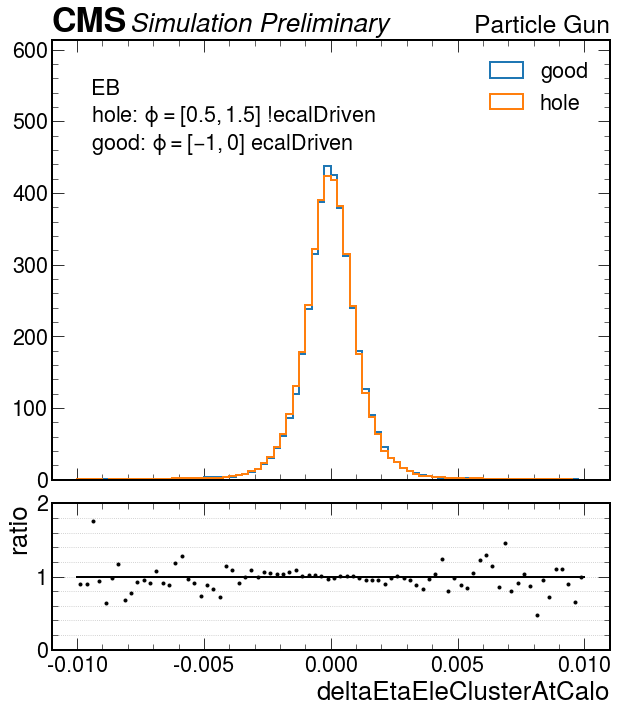

In [38]:
plot_comparison(dfgood.ele_deltaEtaEleClusterAtCalo,
                dfhole.ele_deltaEtaEleClusterAtCalo,
                var=f"deltaEtaEleClusterAtCalo", label="deltaEtaEleClusterAtCalo",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=80, xrange=(-0.01,0.01), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 999.9999999999997
A. 999.9999999999998


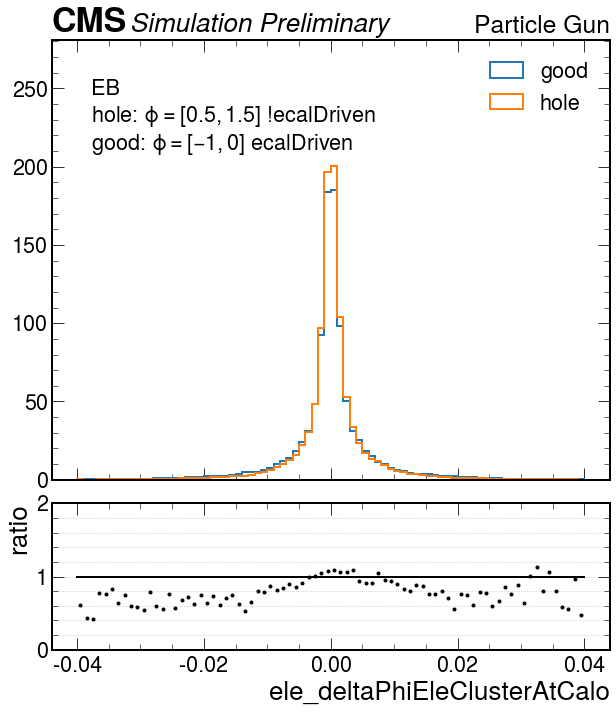

In [40]:
plot_comparison(dfgood.ele_deltaPhiEleClusterAtCalo,
                dfhole.ele_deltaPhiEleClusterAtCalo,
                var=f"ele_deltaPhiEleClusterAtCalo", label="ele_deltaPhiEleClusterAtCalo",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=80, xrange=(-0.04,0.04), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 0.05999999999999999
A. 0.06


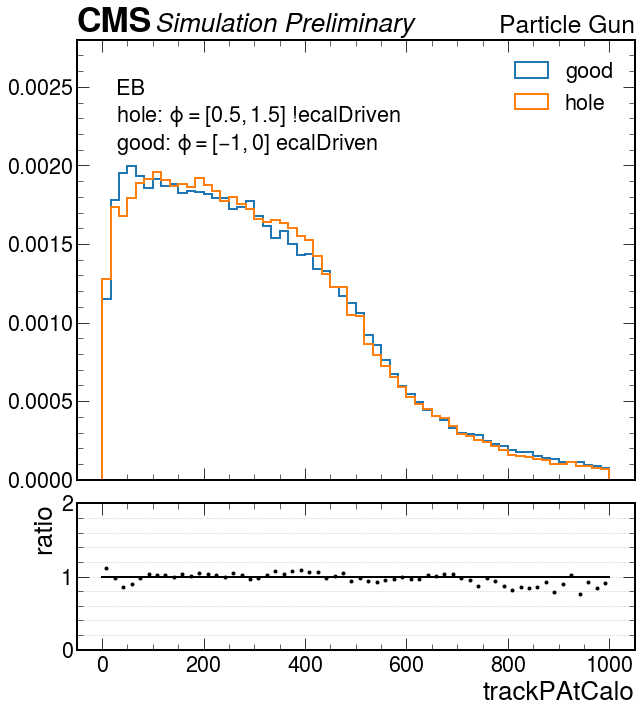

In [45]:
plot_comparison(dfgood.ele_trackPAtCalo,
                dfhole.ele_trackPAtCalo,
                var=f"ele_trackPAtCalo", label="trackPAtCalo",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=60, xrange=(0, 1000), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 79.99999999999999
A. 79.99999999999999


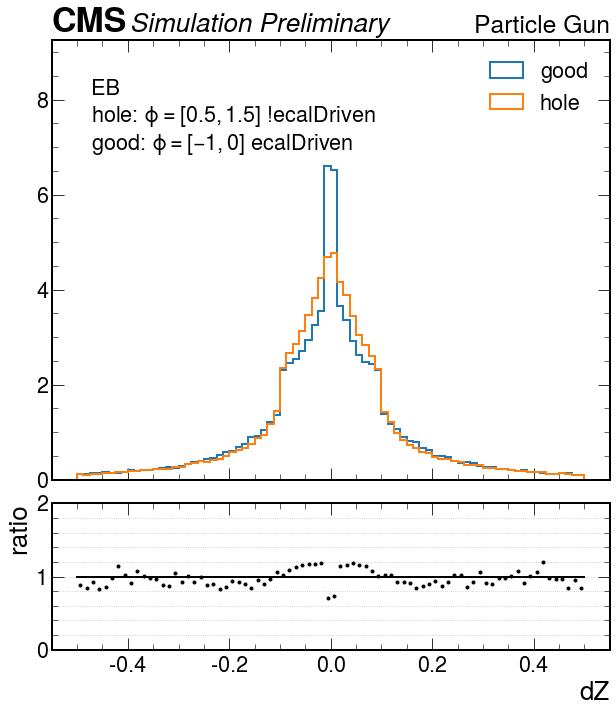

In [57]:
plot_comparison(dfgood.ele_dz,
                dfhole.ele_dz,
                var=f"ele_dz", label="dZ",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=80, xrange=(-0.5,0.5), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 199.99999999999997
A. 200.00000000000003


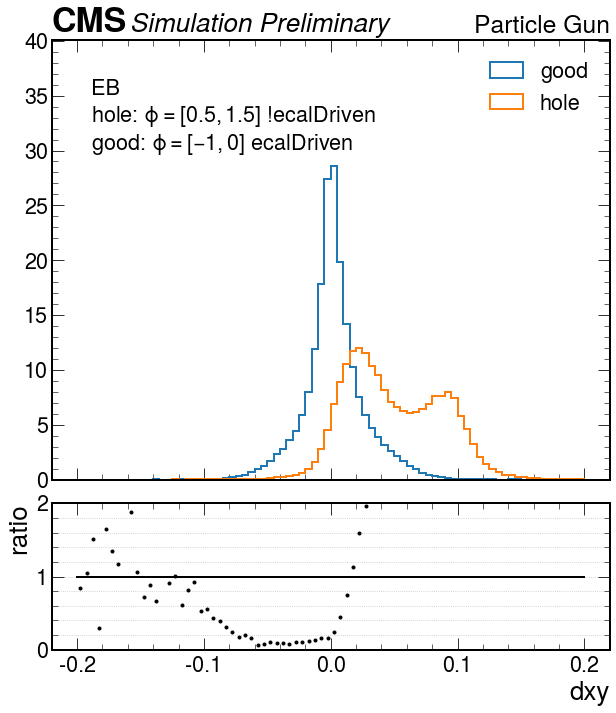

In [60]:
plot_comparison(dfgood.ele_dxy,
                dfhole.ele_dxy,
                var=f"ele_dxy", label="dxy",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=80, xrange=(-0.2,0.2), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)

B: 199.99999999999997
A. 200.0


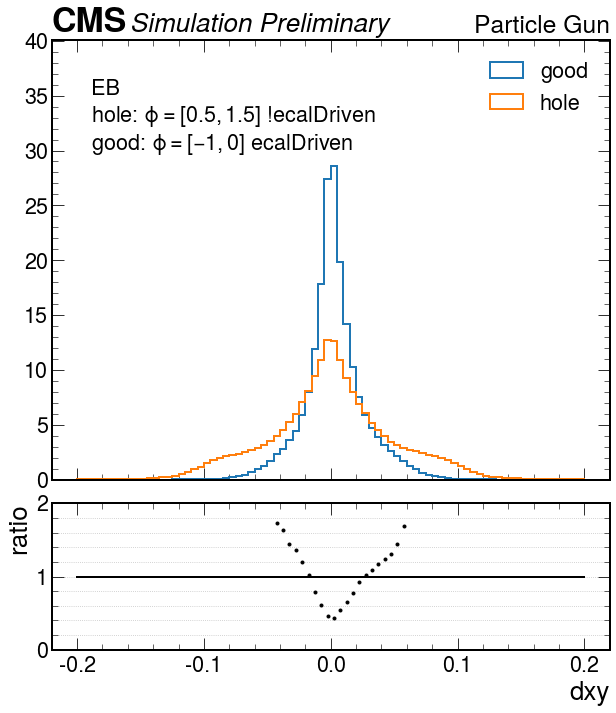

In [62]:
plot_comparison(dfgood.ele_dxy,
                dfgood_ee.ele_dxy,
                var=f"ele_dxy_good_vs_goodee", label="dxy",
                legendA="hole", legendB="good",
                text="EB\nhole: $\phi = [0.5, 1.5]$ !ecalDriven\ngood: $\phi = [-1, 0]$ ecalDriven",
                output_folder=output_folder,
                bins=80, xrange=(-0.2,0.2), ratio_lim=(0,2), 
                rlabel="Particle Gun",
               density=True)